In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


UNZIPPING IM.DB AND CONNECTING TO SQLITE

In [3]:
import zipfile
import os

zip_path = "../zippedData/im.db.zip"
extract_path = "../zippedData/"

if not os.path.exists(os.path.join(extract_path, "im.db")):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("im.db extracted successfully!")
else:
    print("im.db already extracted.")        

im.db extracted successfully!


In [8]:
import sqlite3
import pandas as pd

connect = sqlite3.connect("../zippedData/im.db")

movie_basics = pd.read_sql("SELECT * FROM movie_basics", connect)
movie_ratings =pd.read_sql("SELECT * FROM movie_ratings", connect)

movie_basics.head()



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
movie_basics.info()
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


LOADING THE TWO TABLES

In [10]:
import sqlite3
import numpy as np
import pandas as pd

connect = sqlite3.connect("../zippedData/im.db")

movie_basics = pd.read_sql("""
    SELECT movie_id, primary_title, original_title, start_year, runtime_minutes, genres
    FROM movie_basics
""", connect)

movie_ratings = pd.read_sql("""
    SELECT movie_id, averageRating AS avg_rating, numVotes AS votes
    FROM movie_ratings
""", connect)

len(movie_basics), len(movie_ratings), movie_basics.head(2), movie_ratings.head(2)

(146144,
 73856,
     movie_id                    primary_title   original_title  start_year  \
 0  tt0063540                        Sunghursh        Sunghursh        2013   
 1  tt0066787  One Day Before the Rainy Season  Ashad Ka Ek Din        2019   
 
    runtime_minutes              genres  
 0            175.0  Action,Crime,Drama  
 1            114.0     Biography,Drama  ,
      movie_id  avg_rating  votes
 0  tt10356526         8.3     31
 1  tt10384606         8.9    559)

STANDARDIZE DTYPES

In [13]:
movie_basics["start_year"] = pd.to_numeric(movie_basics["start_year"], errors="coerce").astype("Int64")
movie_basics["runtime_minutes"] = pd.to_numeric(movie_basics["runtime_minutes"], errors="coerce").astype("Int64")

movie_ratings["avg_rating"] = pd.to_numeric(movie_ratings["avg_rating"], errors="coerce")
movie_ratings["votes"]= pd.to_numeric(movie_ratings["votes"], errors="coerce").astype("Int64")

    TIDY STRINGS

In [15]:
for c in ["primary_title", "original_title", "genres"]:
    movie_basics[c] = movie_basics[c].astype("string").str.strip()

KEEPING MOVIES WITH A YEAR AND A POSITIVE NUMBER OF VOTES

In [16]:
movie_basics = movie_basics.dropna(subset=["start_year"])
movie_ratings = movie_ratings.dropna(subset=["avg_rating", "votes"])

REMOVING OF DUPLICATES IN MOVIE_ID

In [17]:
movie_basics = movie_basics.drop_duplicates(subset="movie_id")
movie_ratings = movie_ratings.drop_duplicates(subset="movie_id")

In [18]:
movie_ratings = movie_ratings[movie_ratings["votes"] >= 1000]

In [19]:
movie_basics.info(), movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   movie_id         146144 non-null  object
 1   primary_title    146144 non-null  string
 2   original_title   146123 non-null  string
 3   start_year       146144 non-null  Int64 
 4   runtime_minutes  114405 non-null  Int64 
 5   genres           140736 non-null  string
dtypes: Int64(2), object(1), string(3)
memory usage: 7.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 9617 entries, 3 to 73831
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie_id    9617 non-null   object 
 1   avg_rating  9617 non-null   float64
 2   votes       9617 non-null   Int64  
dtypes: Int64(1), float64(1), object(1)
memory usage: 309.9+ KB


(None, None)

CONVERTING MOVIE ID INTO A STRING

In [20]:
movie_basics["movie_id"] = movie_basics["movie_id"].astype("string")
movie_ratings["movie_id"] = movie_ratings["movie_id"].astype("string")

In [21]:
movie_basics = movie_basics.dropna(subset=["runtime_minutes"])

In [22]:
movie_basics["genres"] = movie_basics["genres"].str.split(",")

In [23]:
movie_basics.info(), movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114405 entries, 0 to 146142
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   movie_id         114405 non-null  string
 1   primary_title    114405 non-null  string
 2   original_title   114401 non-null  string
 3   start_year       114405 non-null  Int64 
 4   runtime_minutes  114405 non-null  Int64 
 5   genres           112233 non-null  object
dtypes: Int64(2), object(1), string(3)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 9617 entries, 3 to 73831
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie_id    9617 non-null   string 
 1   avg_rating  9617 non-null   float64
 2   votes       9617 non-null   Int64  
dtypes: Int64(1), float64(1), string(1)
memory usage: 309.9 KB


(None, None)

REPLACING MISSING GENRES WITH UNKNOWN

In [24]:
movie_basics["genres"] = movie_basics["genres"].apply(lambda x: x if isinstance(x, list) else["unkown"])

In [25]:
movie_basics.info(), movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114405 entries, 0 to 146142
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   movie_id         114405 non-null  string
 1   primary_title    114405 non-null  string
 2   original_title   114401 non-null  string
 3   start_year       114405 non-null  Int64 
 4   runtime_minutes  114405 non-null  Int64 
 5   genres           114405 non-null  object
dtypes: Int64(2), object(1), string(3)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 9617 entries, 3 to 73831
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie_id    9617 non-null   string 
 1   avg_rating  9617 non-null   float64
 2   votes       9617 non-null   Int64  
dtypes: Int64(1), float64(1), string(1)
memory usage: 309.9 KB


(None, None)

MERGING THE CLEANED IMDB

In [27]:
imdb_clean = movie_basics.merge(movie_ratings, on="movie_id", how="inner")

imdb_clean["year"] = imdb_clean["start_year"].astype("Int64")
imdb_clean["main_genre"] = imdb_clean["genres"].str[0].fillna("Unknown")

imdb_clean["title_norm"] = (
    imdb_clean["primary_title"]
        .str.lower()
        .str.replace("[^a-z0-9 ]", "", regex=True)
        .str.strip()
)

imdb_clean.head(), imdb_clean.shape


(    movie_id               primary_title              original_title  \
 0  tt0069049  The Other Side of the Wind  The Other Side of the Wind   
 1  tt0249516                  Foodfight!                  Foodfight!   
 2  tt0293069                  Dark Blood                  Dark Blood   
 3  tt0315642                       Wazir                       Wazir   
 4  tt0323808             The Wicker Tree             The Wicker Tree   
 
    start_year  runtime_minutes                       genres  avg_rating  \
 0        2018              122                      [Drama]         6.9   
 1        2012               91  [Action, Animation, Comedy]         1.9   
 2        2012               86                   [Thriller]         6.6   
 3        2016              103       [Action, Crime, Drama]         7.1   
 4        2011               96              [Drama, Horror]         3.9   
 
    votes  year main_genre                  title_norm  
 0   4517  2018      Drama  the other side of

CLEANING THE BOX OFFICE

In [28]:
bom = pd.read_csv("../zippedData/bom.movie_gross.csv.gz")
bom.head(), bom.columns.tolist(), bom.shape

(                                         title studio  domestic_gross  \
 0                                  Toy Story 3     BV     415000000.0   
 1                   Alice in Wonderland (2010)     BV     334200000.0   
 2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
 3                                    Inception     WB     292600000.0   
 4                          Shrek Forever After   P/DW     238700000.0   
 
   foreign_gross  year  
 0     652000000  2010  
 1     691300000  2010  
 2     664300000  2010  
 3     535700000  2010  
 4     513900000  2010  ,
 ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'],
 (3387, 5))

CLEANING CURRENCY AND YEAR

In [29]:
bom.columns = [c.lower().strip() for c in bom.columns]

def money_to_int(s):
    if pd.isna(s):return np.nan
    return pd.to_numeric(str(s).replace("$","").str(), errors="coerce")

TRYING COMMON NAMES

In [32]:
for col in ["domestic_gross", "foreign_gross", "worldwide_gross"]:
    if col in bom.columns:
        bom[col] = (
            pd.to_numeric(
                bom[col].astype("string").str.replace(r"[\$,]", "", regex=True),
                errors="coerce"
            ).astype("Int64")
        )


YEAR

In [35]:
year_col = "year" if "year" in bom.columns else ("release_year" if "release_year" in bom.columns else None)
if year_col is None:
    raise ValueError("Could not find a year column in the BOM file — check bom.columns")


bom["year"] = (
    pd.to_numeric(
        bom[year_col].astype("string").str.extract(r"(\d{4})", expand=False),
        errors="coerce"
    ).astype("Int64")
)


TIDYING TITLE AND THE NORMALIZED VERSION

In [36]:
title_column = "title" if "title" in bom.columns else ("movie" if "movie" in bom.columns else None)
if title_column is None:
    raise ValueError("Could not find a title column in the BOM file - check bom.columns")

bom["title"] = bom[title_column].astype("string").str.strip()
bom["title_norm"] = (bom["title"]
                     .str.lower()
                     .str.replace(r"[:.,''!?\-]"," ", regex=True)
                     .str.replace(r"\s+", " ", regex=True)
                     .str.strip())



In [39]:
bom = bom.dropna(subset=["title", "year"])
bom = bom.drop_duplicates(subset=["title_norm","year"])

In [40]:
bom.head(), bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   string
 1   studio          3382 non-null   object
 2   domestic_gross  3359 non-null   Int64 
 3   foreign_gross   2037 non-null   Int64 
 4   year            3387 non-null   Int64 
 5   title_norm      3387 non-null   string
dtypes: Int64(3), object(1), string(2)
memory usage: 168.8+ KB


(                                         title studio  domestic_gross  \
 0                                  Toy Story 3     BV       415000000   
 1                   Alice in Wonderland (2010)     BV       334200000   
 2  Harry Potter and the Deathly Hallows Part 1     WB       296000000   
 3                                    Inception     WB       292600000   
 4                          Shrek Forever After   P/DW       238700000   
 
    foreign_gross  year                                   title_norm  
 0      652000000  2010                                  toy story 3  
 1      691300000  2010                   alice in wonderland (2010)  
 2      664300000  2010  harry potter and the deathly hallows part 1  
 3      535700000  2010                                    inception  
 4      513900000  2010                          shrek forever after  ,
 None)

MERGING IMDB + BOM

In [45]:
cols_to_use = ["title", "title_norm", "year"] + \
    [c for c in ["domestic_gross", "foreign_gross", "worldwide_gross"] if c in bom.columns]

merged = imdb_clean.merge(
    bom[cols_to_use],
    on=["title_norm", "year"],
    how="inner",
    suffixes=("", "_bom")
)
print("Rows in IMDB clean:", len(imdb_clean))
print("Rows in BOM clean:,", len(bom))
print("Merged rows:", len(merged))

merged.head(30)

Rows in IMDB clean: 9609
Rows in BOM clean:, 3387
Merged rows: 1681


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,avg_rating,votes,year,main_genre,title_norm,title,domestic_gross,foreign_gross
0,tt0315642,Wazir,Wazir,2016,103,"[Action, Crime, Drama]",7.1,15378,2016,Action,wazir,Wazir,1100000,<NA>
1,tt0337692,On the Road,On the Road,2012,124,"[Adventure, Drama, Romance]",6.1,37886,2012,Adventure,on the road,On the Road,744000,8000000
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114,"[Adventure, Comedy, Drama]",7.3,275300,2013,Adventure,the secret life of walter mitty,The Secret Life of Walter Mitty,58200000,129900000
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114,"[Action, Crime, Drama]",6.5,105116,2014,Action,a walk among the tombstones,A Walk Among the Tombstones,26300000,26900000
4,tt0369610,Jurassic World,Jurassic World,2015,124,"[Action, Adventure, Sci-Fi]",7.0,539338,2015,Action,jurassic world,Jurassic World,652300000,1019
5,tt0376136,The Rum Diary,The Rum Diary,2011,119,"[Comedy, Drama]",6.2,94787,2011,Comedy,the rum diary,The Rum Diary,13100000,10800000
6,tt0376479,American Pastoral,American Pastoral,2016,108,"[Crime, Drama]",6.1,12898,2016,Crime,american pastoral,American Pastoral,544000,<NA>
7,tt0383010,The Three Stooges,The Three Stooges,2012,92,"[Comedy, Family]",5.1,28570,2012,Comedy,the three stooges,The Three Stooges,44300000,10500000
8,tt0398286,Tangled,Tangled,2010,100,"[Adventure, Animation, Comedy]",7.8,366366,2010,Adventure,tangled,Tangled,200800000,391000000
9,tt0401729,John Carter,John Carter,2012,132,"[Action, Adventure, Sci-Fi]",6.6,241792,2012,Action,john carter,John Carter,73100000,211100000


SAVING THE CLEANED DATASET

In [46]:
import os
os.makedirs("../clean", exist_ok=True)

imdb_clean.to_csv("../clean/imbd_clean.csv", index=False)
bom.to_csv("../clean/bom_clean.csv", index=False)
merged.to_csv("../clean/movies_merged.csv", index=False)

"saved to /clean: imbd_clean.csv, bom_clean.csv, movies_merged.csv"

'saved to /clean: imbd_clean.csv, bom_clean.csv, movies_merged.csv'

PLOTING

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


CHART DISTRIBUTION OF IMDb RATINGS

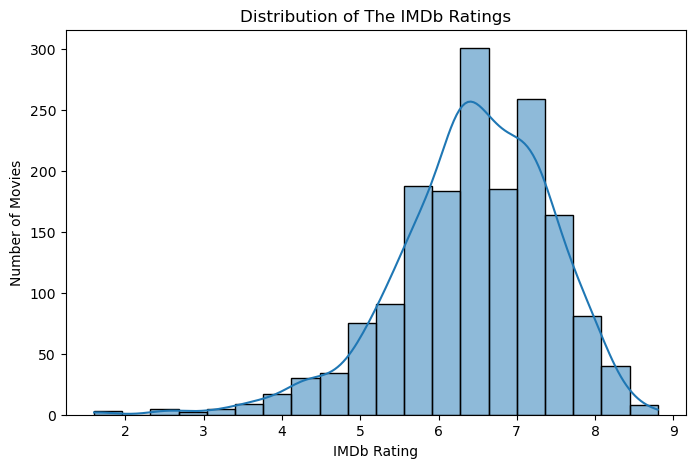

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(merged["avg_rating"], kde=True, bins=20)
plt.title("Distribution of The IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Movies")
plt.show()

TOP 20 MOVIES GENRES

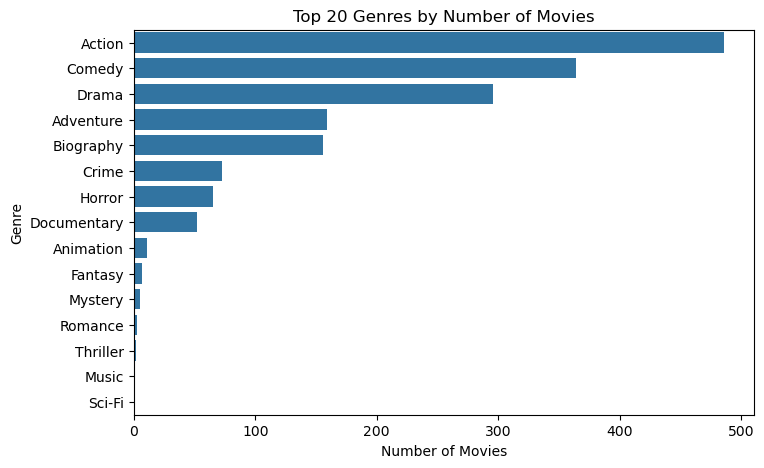

In [50]:
genre_counts = merged['main_genre'].value_counts().head(20)
plt.figure(figsize=(8,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 20 Genres by Number of Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

AVERAGE WORLDWIDE GROSS BY GENRE

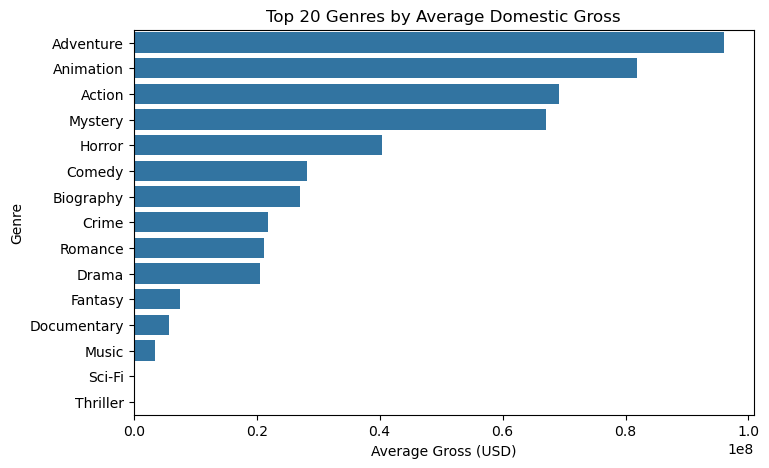

In [51]:
gross_col = "worldwide_gross" if "worldwide_gross" in merged.columns else "domestic_gross"
genre_gross = merged.groupby("main_genre")[gross_col].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(8,5))
sns.barplot(x=genre_gross.values, y=genre_gross.index)
plt.title(f"Top 20 Genres by Average {gross_col.replace('_', ' ').title()}")
plt.xlabel("Average Gross (USD)")
plt.ylabel("Genre")
plt.show()

RATING VS WORLDWIDE GROSS

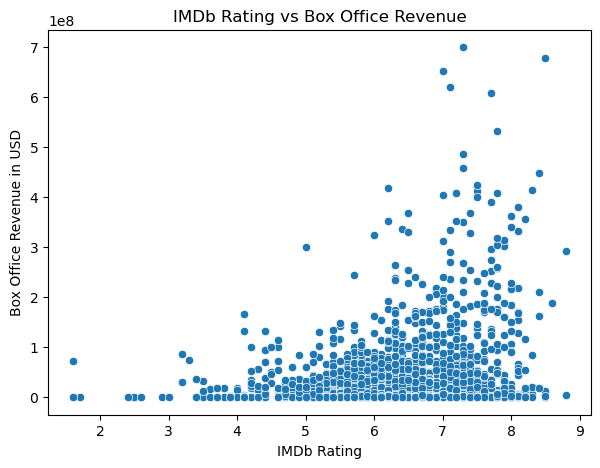

In [52]:
gross_col ="worldwide_gross" if "worldwide_gross" in merged.columns else "domestic_gross"
plt.figure(figsize=(7,5))
sns.scatterplot(data=merged, x="avg_rating", y=gross_col)
plt.title("IMDb Rating vs Box Office Revenue")
plt.xlabel("IMDb Rating")
plt.ylabel("Box Office Revenue in USD")
plt.show()

VOTES VS BOX OFFICE


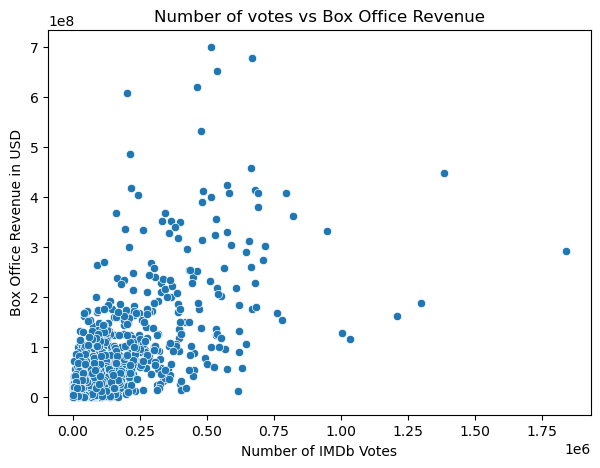

In [53]:
gross_col = "worldwide_gross" if "worldwide_gross" in merged.columns else "domestic_gross"
plt.figure(figsize=(7,5))
sns.scatterplot(data=merged, x="votes", y=gross_col)
plt.title("Number of votes vs Box Office Revenue")
plt.xlabel("Number of IMDb Votes")
plt.ylabel("Box Office Revenue in USD")
plt.show()